In [1]:
! pip install -q kaggle
! cp /content/key/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d marcosgabriel/infrared-solar-modules

cp: cannot stat '/content/key/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/marcosgabriel/infrared-solar-modules
License(s): MIT
 33%|████████████▍                         | 5.00M/15.2M [00:00<00:00, 44.5MB/s]
100%|███████████████████████████████████████| 15.2M/15.2M [00:00<00:00, 100MB/s]


In [2]:
import zipfile
import os

def extract_zip_file():
        """
        zip_file_path: str
        Extract the zip file into the data directory
        Function returns None
        """
        unzip_path = "data_ingestion"
        os.makedirs(unzip_path, exist_ok=True)
        with zipfile.ZipFile("infrared-solar-modules.zip", 'r') as zip_ref:
            zip_ref.extractall(unzip_path)
extract_zip_file()

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2


In [4]:
DATA_PATH = 'data_ingestion/2020-02-14_InfraredSolarModules/InfraredSolarModules'
METADATA_PATH = os.path.join(DATA_PATH, 'module_metadata.json')

In [5]:
df = pd.read_json(METADATA_PATH, orient='index').sort_index()
df['image_filepath'] = df.image_filepath.apply(lambda x: os.path.join(DATA_PATH, x))
df

,image_filepath,anomaly_class
0,data_ingestion/2020-02-14_InfraredSolarModules...,Offline-Module
1,data_ingestion/2020-02-14_InfraredSolarModules...,Offline-Module
2,data_ingestion/2020-02-14_InfraredSolarModules...,Offline-Module
3,data_ingestion/2020-02-14_InfraredSolarModules...,Offline-Module
4,data_ingestion/2020-02-14_InfraredSolarModules...,Offline-Module
...,...,...
19995,data_ingestion/2020-02-14_InfraredSolarModules...,No-Anomaly
19996,data_ingestion/2020-02-14_InfraredSolarModules...,No-Anomaly
19997,data_ingestion/2020-02-14_InfraredSolarModules...,No-Anomaly
19998,data_ingestion/2020-02-14_InfraredSolarModules...,No-Anomaly



Unique values and their frequency:
anomaly_class
No-Anomaly        10000
Cell               1877
Vegetation         1639
Diode              1499
Cell-Multi         1288
Shadowing          1056
Cracking            940
Offline-Module      827
Hot-Spot            249
Hot-Spot-Multi      246
Soiling             204
Diode-Multi         175
Name: count, dtype: int64


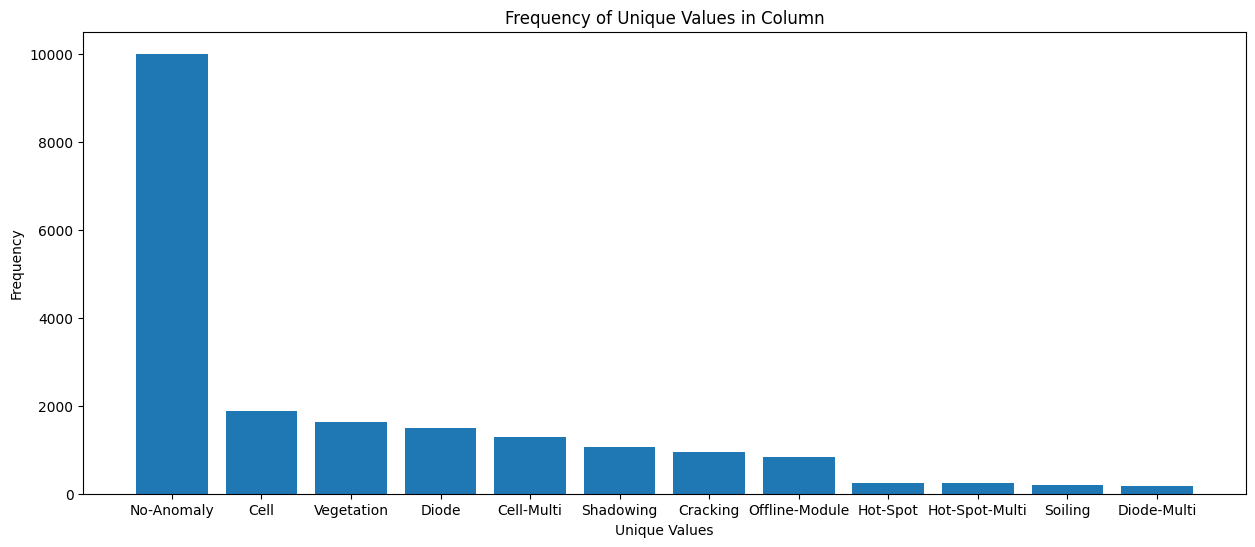

In [6]:
# Get unique values and their frequency
unique_values = df['anomaly_class'].value_counts()
print("\nUnique values and their frequency:")
print(unique_values)

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the bar chart
plt.bar(unique_values.index, unique_values.values)

# Set labels and title

plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Values in Column')

# Show the plot
plt.show()

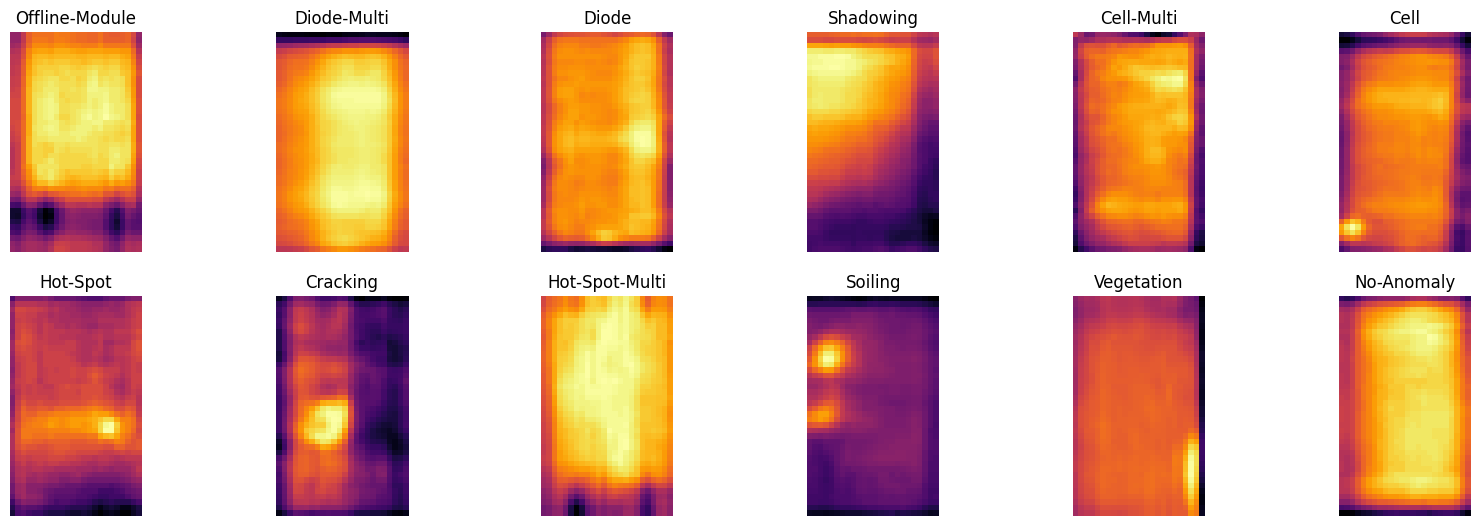

In [7]:

# Get unique anomaly classes
unique_classes = df['anomaly_class'].unique()

# Plot the sampled images
plt.figure(figsize=(20, 20))

for i, class_name in enumerate(unique_classes, start=1):
    # Sample one image for each class
    sample = df[df['anomaly_class'] == class_name].sample(n=1).iloc[0]
    
    image = cv2.imread(sample['image_filepath'], 0)
    
    plt.subplot(6, 6, i)
    plt.imshow(image, cmap='inferno')
    plt.title(class_name)
    plt.axis('off')

plt.show()

In [8]:
crystal_df = df.query('anomaly_class != ("Hot-Spot", "Hot-Spot-Multi")')
crystal_df

,image_filepath,anomaly_class
0,data_ingestion/2020-02-14_InfraredSolarModules...,Offline-Module
1,data_ingestion/2020-02-14_InfraredSolarModules...,Offline-Module
2,data_ingestion/2020-02-14_InfraredSolarModules...,Offline-Module
3,data_ingestion/2020-02-14_InfraredSolarModules...,Offline-Module
4,data_ingestion/2020-02-14_InfraredSolarModules...,Offline-Module
...,...,...
19995,data_ingestion/2020-02-14_InfraredSolarModules...,No-Anomaly
19996,data_ingestion/2020-02-14_InfraredSolarModules...,No-Anomaly
19997,data_ingestion/2020-02-14_InfraredSolarModules...,No-Anomaly
19998,data_ingestion/2020-02-14_InfraredSolarModules...,No-Anomaly


In [9]:
thin_film_df = df.query('anomaly_class == ("Hot-Spot", "Hot-Spot-Multi")')
thin_film_df

,image_filepath,anomaly_class
6722,data_ingestion/2020-02-14_InfraredSolarModules...,Hot-Spot
6723,data_ingestion/2020-02-14_InfraredSolarModules...,Hot-Spot
6724,data_ingestion/2020-02-14_InfraredSolarModules...,Hot-Spot
6725,data_ingestion/2020-02-14_InfraredSolarModules...,Hot-Spot
6726,data_ingestion/2020-02-14_InfraredSolarModules...,Hot-Spot
...,...,...
8152,data_ingestion/2020-02-14_InfraredSolarModules...,Hot-Spot-Multi
8153,data_ingestion/2020-02-14_InfraredSolarModules...,Hot-Spot-Multi
8154,data_ingestion/2020-02-14_InfraredSolarModules...,Hot-Spot-Multi
8155,data_ingestion/2020-02-14_InfraredSolarModules...,Hot-Spot-Multi


In [10]:
crystal_df['image_filepath']

0        data_ingestion/2020-02-14_InfraredSolarModules...
1        data_ingestion/2020-02-14_InfraredSolarModules...
2        data_ingestion/2020-02-14_InfraredSolarModules...
3        data_ingestion/2020-02-14_InfraredSolarModules...
4        data_ingestion/2020-02-14_InfraredSolarModules...
                               ...                        
19995    data_ingestion/2020-02-14_InfraredSolarModules...
19996    data_ingestion/2020-02-14_InfraredSolarModules...
19997    data_ingestion/2020-02-14_InfraredSolarModules...
19998    data_ingestion/2020-02-14_InfraredSolarModules...
19999    data_ingestion/2020-02-14_InfraredSolarModules...
Name: image_filepath, Length: 19505, dtype: object

In [11]:
# Import necessary libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter

In [12]:
# Separate the features and target
X = crystal_df.drop(columns='anomaly_class')
y = crystal_df['anomaly_class']

In [13]:
# Print class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

Class distribution before oversampling: Counter({'No-Anomaly': 10000, 'Cell': 1877, 'Vegetation': 1639, 'Diode': 1499, 'Cell-Multi': 1288, 'Shadowing': 1056, 'Cracking': 940, 'Offline-Module': 827, 'Soiling': 204, 'Diode-Multi': 175})


In [14]:
# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)
# Apply RandomOverSampler
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Print class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

Class distribution after oversampling: Counter({'Offline-Module': 10000, 'Diode-Multi': 10000, 'Diode': 10000, 'Shadowing': 10000, 'Cell-Multi': 10000, 'Cell': 10000, 'Cracking': 10000, 'Soiling': 10000, 'Vegetation': 10000, 'No-Anomaly': 10000})


In [15]:
# Split the resampled data into training and testing sets
train_df, test_df = train_test_split(resampled_df, train_size=0.8, shuffle=True, random_state=1)

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D

2024-06-22 10:26:53.346673: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 10:26:53.346790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 10:26:53.481320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [18]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_filepath',
    y_col='anomaly_class',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_filepath',
    y_col='anomaly_class',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)


Found 64000 validated image filenames belonging to 10 classes.
Found 16000 validated image filenames belonging to 10 classes.


In [19]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_filepath',
    y_col='anomaly_class',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 20000 validated image filenames belonging to 10 classes.


In [20]:
# Import EfficientNet
from tensorflow.keras.applications import EfficientNetB0

# Define EfficientNet Model
efficientnet_model = EfficientNetB0(input_shape=(224, 224, 3),
                                    include_top=False,
                                    weights='imagenet',
                                    pooling='avg')
# Freeze the base model
efficientnet_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
# Add custom layers
import tensorflow as tf
inputs = efficientnet_model.input
x = tf.keras.layers.Dense(128, activation='relu')(efficientnet_model.output)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model_efficientnet = tf.keras.Model(inputs, outputs)

In [22]:
# Compile the model
model_efficientnet.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
# Print the model summary
print(model_efficientnet.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,222,445 (16.11 MB)

 Trainable params: 172,874 (675.29 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

None


In [23]:
# Train the model
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history_efficientnet = model_efficientnet.fit(train_images,
                                              validation_data=val_images,
                                              epochs=50,
                                              callbacks=[callbacks])

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   2/2000 ━━━━━━━━━━━━━━━━━━━━ 1:49 55ms/step - accuracy: 0.1328 - loss: 2.2992   

I0000 00:00:1719052063.896509      94 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719052063.949067      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1999/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3956 - loss: 1.6651

W0000 00:00:1719052161.943878      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 156s 60ms/step - accuracy: 0.3956 - loss: 1.6650 - val_accuracy: 0.5311 - val_loss: 1.2688
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 118s 59ms/step - accuracy: 0.5378 - loss: 1.2534 - val_accuracy: 0.5863 - val_loss: 1.1566
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 114s 57ms/step - accuracy: 0.5779 - loss: 1.1550 - val_accuracy: 0.6250 - val_loss: 1.0298
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 116s 58ms/step - accuracy: 0.6096 - loss: 1.0704 - val_accuracy: 0.6666 - val_loss: 0.9131
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 143s 59ms/step - accuracy: 0.6320 - loss: 1.0110 - val_accuracy: 0.6607 - val_loss: 0.9153
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 117s 58ms/step - accuracy: 0.6526 - loss: 0.9559 - val_accuracy: 0.6969 - val_loss: 0.8399
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 116s 58ms/step - accuracy: 0.6658 - loss: 0.9142 - val_accuracy: 0.6696 - val_loss: 0.9062
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 118s 59ms/step - accuracy: 0.6810 - lo

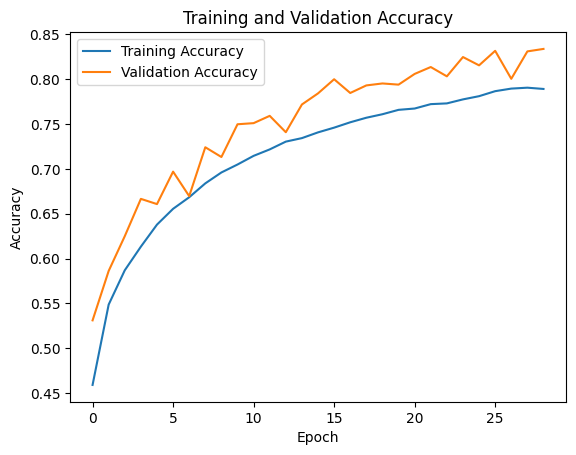

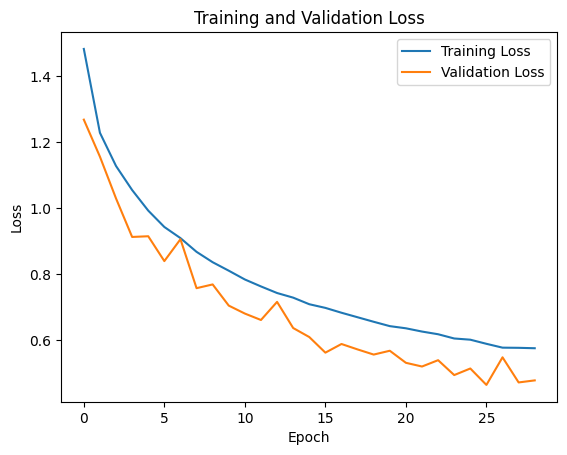

In [24]:
# Plot the training and validation accuracy
plt.plot(history_efficientnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_efficientnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history_efficientnet.history['loss'], label='Training Loss')
plt.plot(history_efficientnet.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
results = model_efficientnet.evaluate(test_images, verbose=0)
print(results)
print(f"Test Accuracy: {np.round(results[1] * 100,2)}%")

[0.46056464314460754, 0.8320000171661377]
Test Accuracy: 83.2%


In [26]:
# Save the entire model to a file
model_efficientnet.save('model_efficientnet.h5')